In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
import torch
import torch.utils.data
from PIL import Image

In [3]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder



transform = transforms.Compose([transforms.ToTensor()])

# path = r"/content/drive/MyDrive/Datasets for glycoma/MyOrigaFolder" #for colab
path = r"D:\Datasets\MyOrigaFolder" #for windows
my_ds1 = ImageFolder(path, transform=transform)


In [4]:
img,label = my_ds1[0]
print(img)
print(label)



tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
0


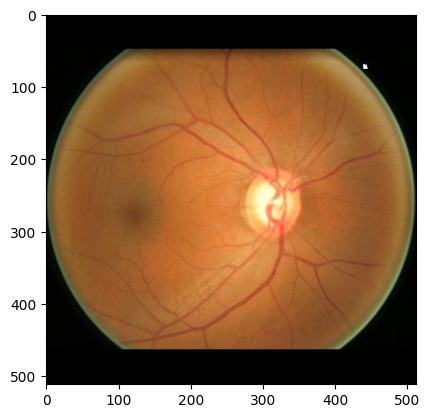

In [5]:
import matplotlib.pyplot as plt

plt.imshow(my_ds1[0][0].permute(1,2,0))

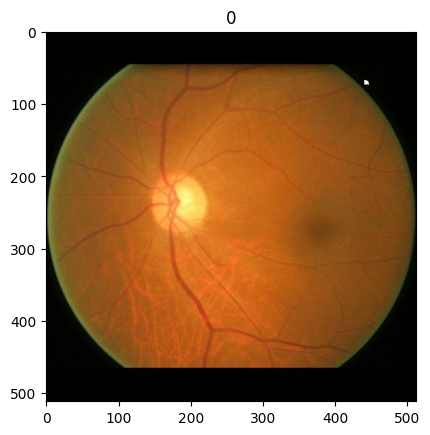

In [6]:
from torch.utils.data import Dataset
import torchvision.transforms as tt
# see youtube vid about how to create custom datasets
# https://www.analyticsvidhya.com/blog/2021/09/torch-dataset-and-dataloader-early-loading-of-data/
# https://youtu.be/NVxCKdp0NhQ
class CustomDS(Dataset):
    def __init__(self, dataAndLables):
        self.dataAndLabels = dataAndLables


    def __len__(self):
        return len(self.dataAndLabels)

    def __getitem__(self, index):
        img = self.dataAndLabels[index][0]
        label = self.dataAndLabels[index][1]
        return img,torch.Tensor([label])

# Since I split the dataset into 2 folders with class 0 and 1 there is no need for custom DS
# ds = CustomDS(dataAndLables)

dataloader = torch.utils.data.DataLoader(my_ds1, batch_size=36, shuffle=False)

toPil = tt.ToPILImage()

for img,label in dataloader:
    plt.title(label=label[35].item())
    plt.imshow(toPil(img[35]))
    break


#checked the customDS and dataloader, and they were tested/crosschecked to be found ok, img 36 in OG dataset is with glycoma and the label we got from dataloader is 1

In [7]:


train_ds, test_ds = torch.utils.data.random_split(dataset=my_ds1, lengths=[0.7,0.3])
print(len(train_ds))
print(len(test_ds))
print(len(train_ds) + len(test_ds))

455
195
650


In [8]:
import torchvision.transforms as tt
train_transforms = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.ToTensor()
])

toPIL = tt.ToPILImage()

my_ds1 = None # this souldnt be used now so mark it as None

my_ds = ImageFolder(path, transform=train_transforms)
train_ds, test_ds = torch.utils.data.random_split(dataset=my_ds, lengths=[0.7,0.3])
print(len(train_ds))
print(len(test_ds))
print(len(train_ds) + len(test_ds))


455
195
650


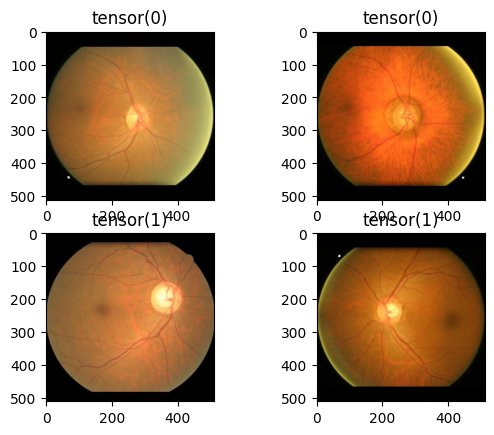

In [9]:
trainLoader = torch.utils.data.DataLoader(train_ds, 4, shuffle=True,)
testLoader = torch.utils.data.DataLoader(test_ds, 4, shuffle=False,)

#lets see if we can apply our transforms
for img,label in testLoader:

    # transformed_imgs_batch = [train_transforms(one_img) for one_img in img] #train_transforms can only take one img at a time

    plt.subplot(2,2,1)
    plt.title(label=label[0])
    plt.imshow(img[0].permute(1,2,0))

    plt.subplot(2,2,2)
    plt.title(label[0])
    plt.imshow(img[1].permute(1,2,0)) # applying/testing our trnsform func, FIRST APPLY the transforms func then apply the .premute()

    plt.subplot(2,2,3)
    plt.title(label[2])
    plt.imshow(img[2].permute(1,2,0))

    plt.subplot(2,2,4)
    plt.title(label[3])
    plt.imshow(img[3].permute(1,2,0))

    break

In [10]:
import torch.nn as nn
import torch.functional as F

In [53]:

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        layers = []
        self.conv_net = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

        
            )

        self.feedforward = nn.Sequential(

            nn.Flatten(),

            nn.Linear(2048, 500),
            nn.LeakyReLU(),
            nn.Linear(500, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        out = self.conv_net(x)
        out = self.feedforward(out)
        return out

In [54]:
model = CNNModel()
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 9673001


In [55]:
for img,lable in trainLoader:
    print(img.shape)
    print(label)
    print(f"Model output shape = {model(img).shape} & label shape = {label.shape}")
    print(model(img))
    break

torch.Size([4, 3, 512, 512])
tensor([0, 0, 1, 1])
Model output shape = torch.Size([4, 1]) & label shape = torch.Size([4])
tensor([[0.5060],
        [0.5060],
        [0.5060],
        [0.5060]], grad_fn=<SigmoidBackward0>)


In [14]:
x = 1
print(torch.tensor(x))
print(torch.Tensor(x))

b = [1,2,3]
print(torch.Tensor(b))

c = [[1],[2],[3]]
print(torch.Tensor(c))

d = [[[1,5],[1,5]],[[2,5],[2,5]]]
print(torch.Tensor(d))

tensor(1)
tensor([0.])
tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])
tensor([[[1., 5.],
         [1., 5.]],

        [[2., 5.],
         [2., 5.]]])


In [15]:
import torch.nn.functional as F

F.binary_cross_entropy(torch.Tensor([[0.1],[0.2],[0.3]]), torch.Tensor([[0],[0],[0]]))

tensor(0.2284)

In [16]:
for img, label in testLoader:
    print(label.shape)
    out = model(img)
    print(out.shape)
    # since label put shapr is [4] and out is [4,1] we have to unsqueez label in 1st dim
    print(torch.unsqueeze(label, 1) .shape)

    # unsqeezing in 0th dim will result in shape [1,4]
    print(torch.unsqueeze(label, 0) .shape)
    break

torch.Size([4])
torch.Size([4, 1])
torch.Size([4, 1])
torch.Size([1, 4])


In [17]:
import torch.nn.functional as F

class CompleteCNNPakage(CNNModel):
    def train_step(self, input_batch, actual_outputs, loss_func):
        # print(f"Actual output shape = {actual_outputs.shape}")
        pred = self(input_batch)

        # print(pred.dtype)
        # print(actual_outputs.dtype)


        loss = loss_func(pred, actual_outputs)
        return loss

    def accuracy(self, outputs, labels):
        preds = torch.Tensor([[round(x.item())]  for x in outputs]) #the preds should be of shape [4,1]
        preds = to_device(preds, get_default_device()) # IMPORANT!!!!!!!!!!!!!!!! These functions return data and do not do it inplace, make sure to assign the return values to a variable
        # print(preds.is_cuda)
        # print(labels.is_cuda)

        acc = torch.sum(preds == labels).item() / len(preds)
        return acc

    def validation(self, trainLoader, loss_func):
        with torch.no_grad(): # IMPORTANT!!!!!! Remeber to put with torch.no_grad() when testing the model or the gradients will keep accumulating and the memory will run out
            losses_sum = 0
            accuracies_sum = 0
            counter = 0
            self.eval()
            for imgs, labels in trainLoader:
                predictions = self(imgs)
                labels = torch.unsqueeze(labels, 1) # get the labels to shape [4,1]
                # also change dtype of labels frm int64 to float32
                labels = labels.type(torch.float32)

                loss  = loss_func(predictions, labels)
                losses_sum += loss

                acc = self.accuracy(predictions, labels)
                accuracies_sum += acc

                counter += 1

                avg_acc = accuracies_sum/counter
                avg_loss = losses_sum/counter

                # print(f" avg_acc = {avg_acc}")

        return avg_acc,avg_loss




def fit_model(model, lr, trainLoader, epochs, opt=torch.optim.Adam, train_transforms=train_transforms, loss_func = F.binary_cross_entropy,):

    optimizer = opt(model.parameters(), lr,)

    for epoch in range(epochs):
        model.train()


        for imgs, labels in trainLoader:
            labels = torch.unsqueeze(labels, 1) # get the labels to shape [4,1]
            # also change dtype of labels frm int64 to float32
            labels = labels.type(torch.float32)

            loss = model.train_step( imgs, labels, loss_func)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # print(loss.item())



    acc,loss = model.validation(trainLoader, loss_func)
    print(f"Done! Accuracy: {acc} & Loss: {loss}")









In [24]:
model = CompleteCNNPakage()

model

CompleteCNNPakage(
  (conv_net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (feedforward): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=1, bias=True)
    (2): Sigmoid()
  )
)

Moving to gpu

In [26]:
# IMPORANT!!!!!!!!!!!!!!!! These functions return data and do not do it inplace, make sure to assign the return values to a variable


def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda:0')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)



In [27]:
device = get_default_device()

model = to_device(model, device)

trainLoader = DeviceDataLoader(trainLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

In [ ]:
print(device)
print(model)

In [30]:
print("Initial acc:")  # 195/4 = 49 (number of batches not num of images)
model.validation(testLoader, F.binary_cross_entropy)

Initial acc:


(0.23129251700680273, tensor(0.6958))

In [23]:
# fit_model(model, 0.000001, trainLoader, 15,)
# working confirmed!

KeyboardInterrupt: 

In [ ]:
import gc
print(gc.collect())

print(len(testLoader))  # 195/4 = 49 (number of batches not num of images)

model.validation(testLoader, F.binary_cross_entropy)

# after around 30 epochs avg_acc = 0.6870748299319728, initial acc = 0.23129251700680273
# model needs more complexity and layers!!!

376
49
 avg_acc = 0.5
 avg_acc = 0.625
 avg_acc = 0.6666666666666666
 avg_acc = 0.625
 avg_acc = 0.65
 avg_acc = 0.6666666666666666
 avg_acc = 0.6428571428571429
 avg_acc = 0.65625
 avg_acc = 0.6944444444444444
 avg_acc = 0.65
 avg_acc = 0.6590909090909091
 avg_acc = 0.6458333333333334
 avg_acc = 0.6730769230769231
 avg_acc = 0.6964285714285714
 avg_acc = 0.7166666666666667
 avg_acc = 0.6875
 avg_acc = 0.6911764705882353
 avg_acc = 0.7083333333333334
 avg_acc = 0.7105263157894737
 avg_acc = 0.7
 avg_acc = 0.7023809523809523
 avg_acc = 0.7045454545454546
 avg_acc = 0.6956521739130435
 avg_acc = 0.7083333333333334
 avg_acc = 0.72
 avg_acc = 0.7211538461538461
 avg_acc = 0.7222222222222222
 avg_acc = 0.7232142857142857
 avg_acc = 0.7327586206896551
 avg_acc = 0.7333333333333333
 avg_acc = 0.717741935483871
 avg_acc = 0.7109375
 avg_acc = 0.7196969696969697
 avg_acc = 0.7205882352941176
 avg_acc = 0.7214285714285714
 avg_acc = 0.7291666666666666
 avg_acc = 0.722972972972973
 avg_acc = 0.71

(0.6870748299319728, tensor(0.6353, device='cuda:0'))